In [29]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('titanic_train.csv',sep=',')


In [4]:
train.drop(["PassengerId"], axis = 1, inplace = True) # Drop 

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#EDA

##Categorical EDA

In [6]:
def eda_object(df,feature):
    a = len(df[feature].unique())
    plt.figure(figsize = [15,min(max(8,a),5)])

    plt.subplot(1,2,1)
    x_ = df.groupby([feature])[feature].count()
    x_.plot(kind='pie')
    plt.title(feature)

    plt.subplot(1,2,2)
    cross_tab = pd.crosstab(df['Survived'],df[feature],normalize=0).reset_index()
    x_ = cross_tab.melt(id_vars=['Survived'])
    x_['value'] = x_['value']

    sns.barplot(x=feature,y='value',hue ='Survived',data=x_,palette = ['b','r','g'],alpha =0.7)
    plt.xticks(rotation='vertical')
    plt.title(feature + " - Survived")

    plt.tight_layout()
    plt.legend()
    plt.show()

rm_list = ['PassengerId','Name','Ticket', "Cabin"]
type_list = ['object']
feature_list = []

for feature in train.columns:
    if (feature not in rm_list) & (train[feature].dtypes in type_list):
        feature_list.append(feature)

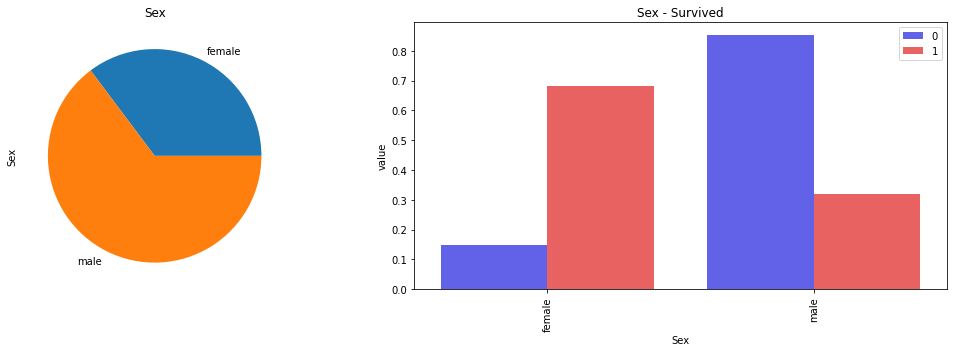

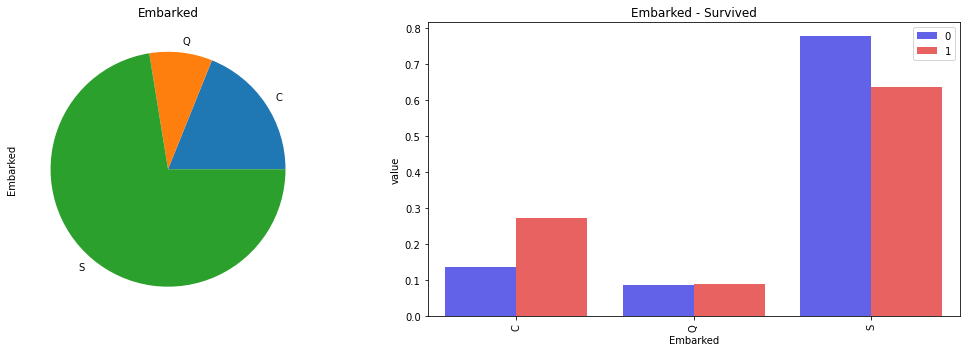

In [7]:
for feature in feature_list:
    eda_object(train,feature)

In [8]:
train[["Survived","Pclass", "Sex", "Cabin", "Embarked"]] = train[["Survived","Pclass", "Sex", "Cabin", "Embarked"]].astype("object")

In [9]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Numerical EDA

In [10]:
def eda_numeric(df,feature):
    x_ = df[feature]
    y_ = df['Survived']
    data = pd.concat([x_,y_],1)
    plt.figure(figsize=[15,5])

    ax1 = plt.subplot(1,2,1)
    sns.boxplot(x='Survived',y=feature,data=data)
    plt.title(feature+ " - Boxplot")
    upper_0 = data[data['Survived']==0][feature].quantile(q=0.75)
    upper_1 = data[data['Survived']==1][feature].quantile(q=0.75)
    lower_0 = data[data['Survived']==0][feature].quantile(q=0.25)
    lower_1 = data[data['Survived']==1][feature].quantile(q=0.25)

    ax1.set(ylim=(min(lower_0,lower_1),max(upper_0,upper_1)))

    ax2 = plt.subplot(1,2,2)
    plt.title(feature+ " - Density with Log")
    
    p1=sns.kdeplot(data[data['Survived']==0][feature].apply(np.log), color="b",legend=False)
    p2=sns.kdeplot(data[data['Survived']==1][feature].apply(np.log), color="r",legend=False)
    plt.legend(loc='upper right', labels=['0', '1'])

    plt.tight_layout()
    plt.show()
    
rm_list = ['PassengerId','Name','Ticket', "Cabin"]
type_list = ['int64','float']
feature_list = []

for feature in train.columns:
    if (feature not in rm_list) & (train[feature].dtypes in type_list) & (len(train[feature].unique()) > 5):
        feature_list.append(feature)

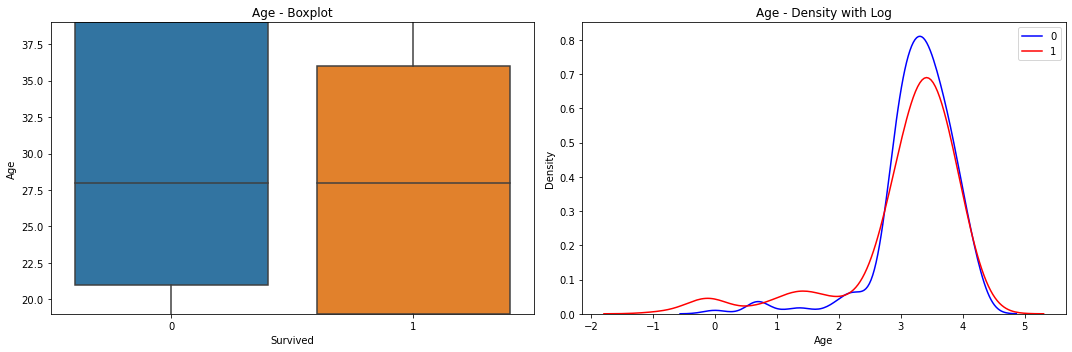

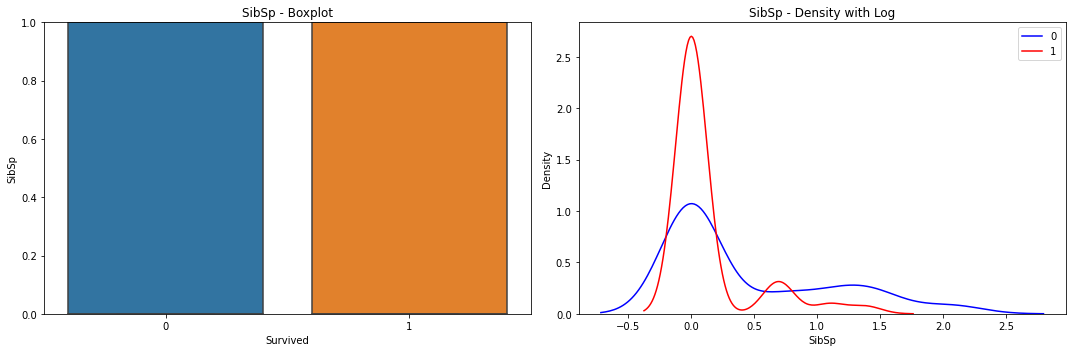

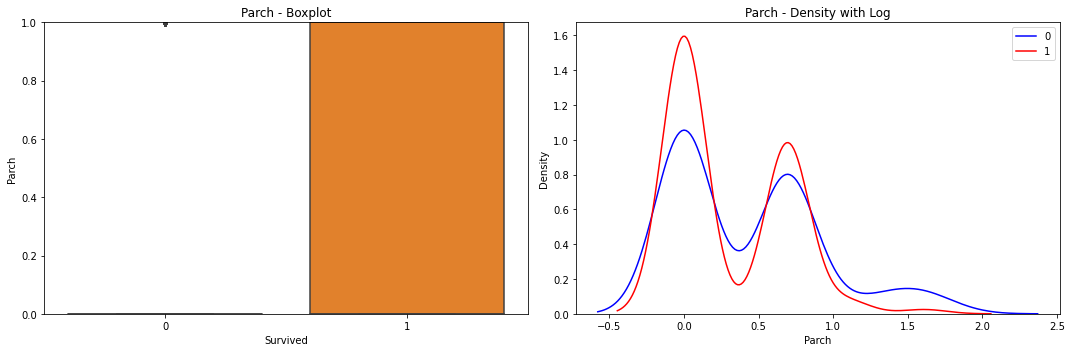

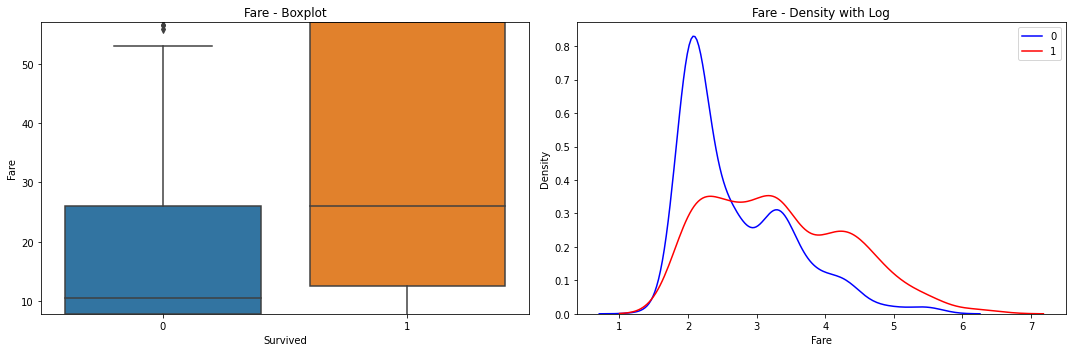

In [11]:
for feature in feature_list:
    eda_numeric(train,feature)

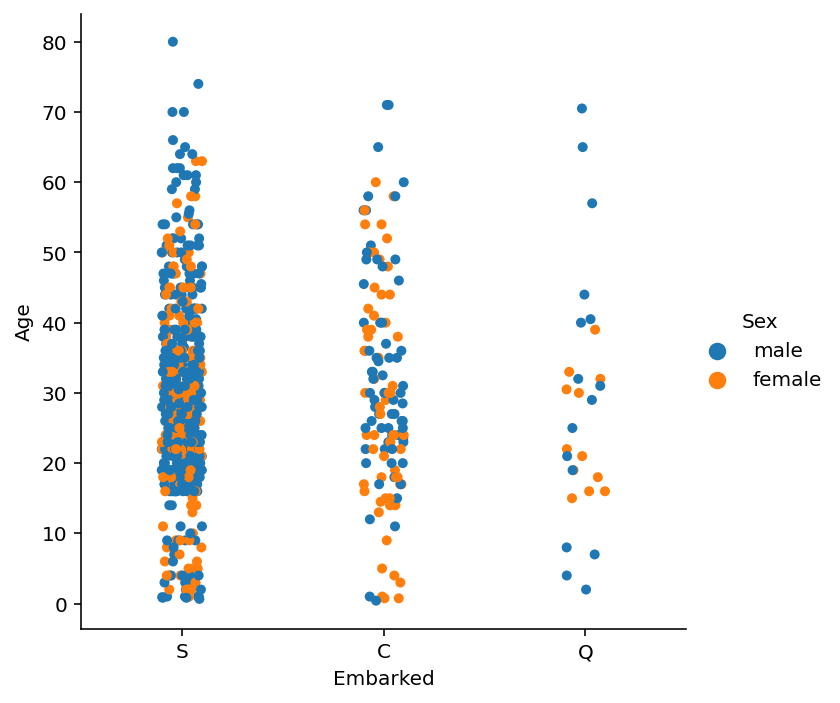

In [12]:
%config InlineBackend.figure_format = "retina"
sns.catplot(x="Embarked",y="Age", data = train, hue = "Sex");

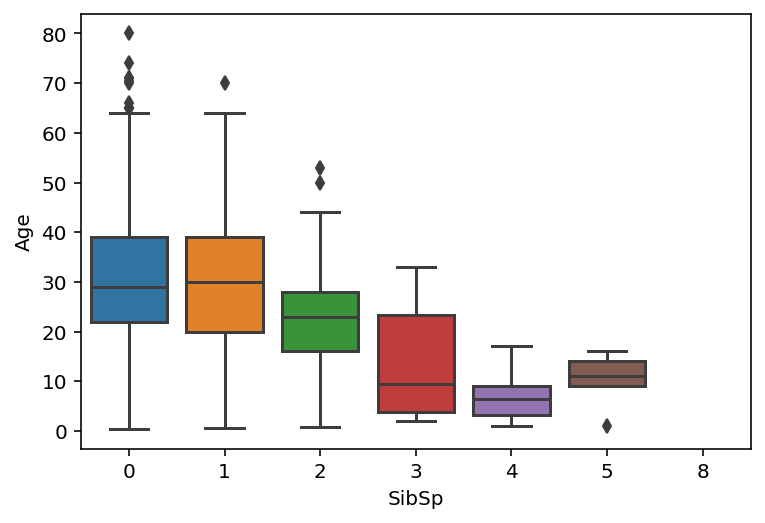

In [13]:
sns.boxplot("SibSp","Age", data = train);

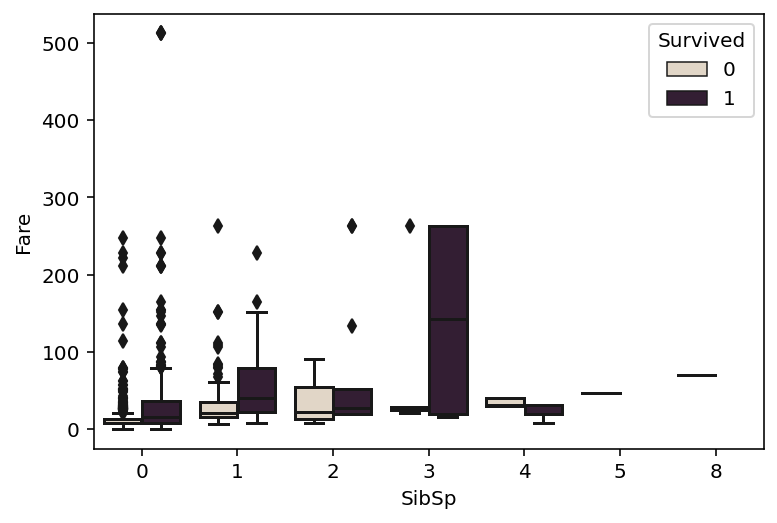

In [14]:
sns.boxplot("SibSp","Fare", hue = "Survived",data = train, palette="ch:.25");

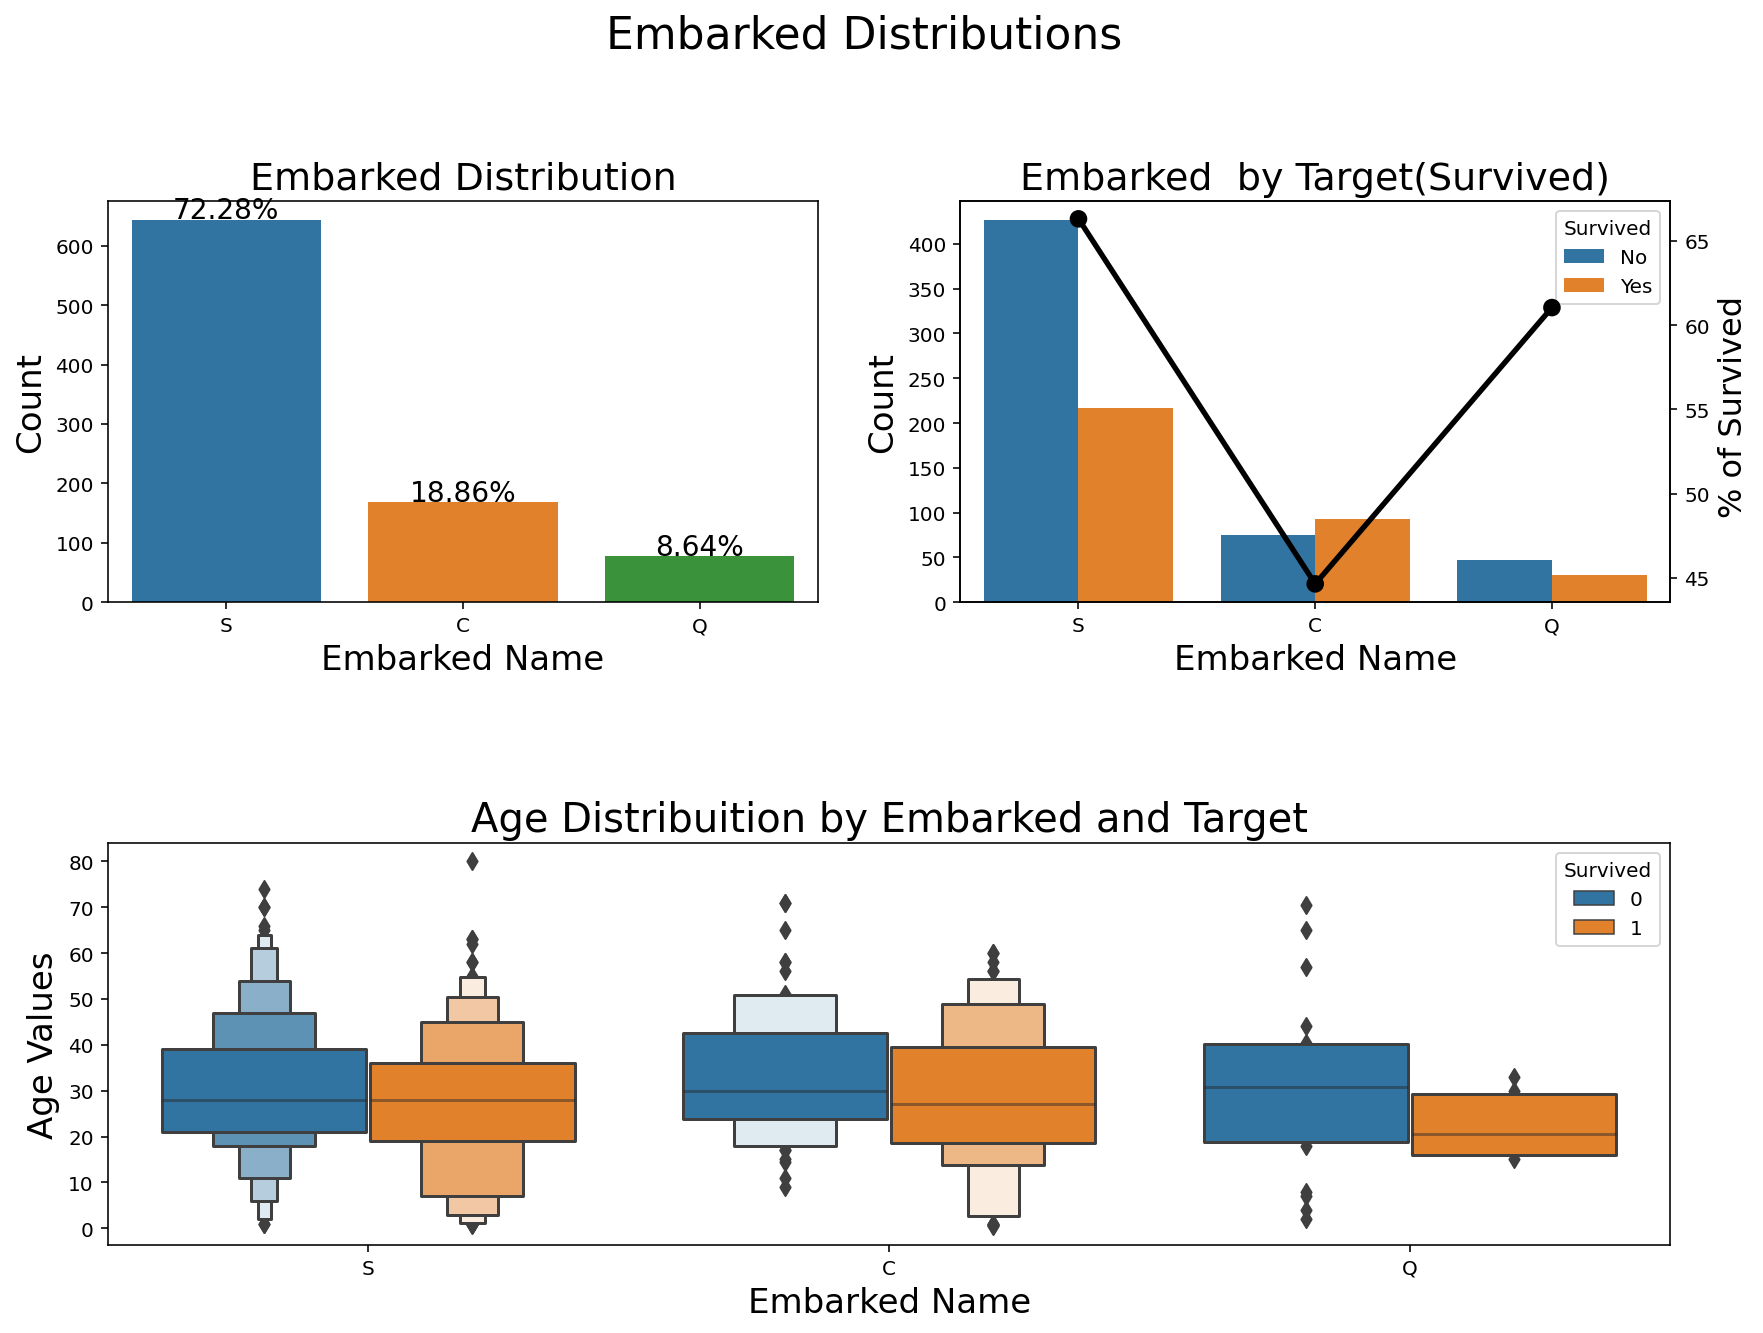

In [15]:
tmp = pd.crosstab(train['Embarked'], train['Survived'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'Survived', 1:'NoSurvived'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Embarked Distributions', fontsize=22)

plt.subplot(221)
g = sns.countplot(x='Embarked', data=train)

g.set_title("Embarked Distribution", fontsize=19)
g.set_xlabel("Embarked Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14) 

plt.subplot(222)
g1 = sns.countplot(x='Embarked', hue='Survived', data=train)
plt.legend(title='Survived', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='Embarked', y='Survived', data=tmp, color='black', order=['S', 'C', 'Q'], legend=False)
gt.set_ylabel("% of Survived ", fontsize=16)

g1.set_title("Embarked  by Target(Survived)", fontsize=19)
g1.set_xlabel("Embarked Name", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplot(212)
g3 = sns.boxenplot(x='Embarked', y='Age', hue='Survived', 
              data=train[train['Age'] <= 100] )
g3.set_title("Age Distribuition by Embarked and Target", fontsize=20)
g3.set_xlabel("Embarked Name", fontsize=17)
g3.set_ylabel("Age Values", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

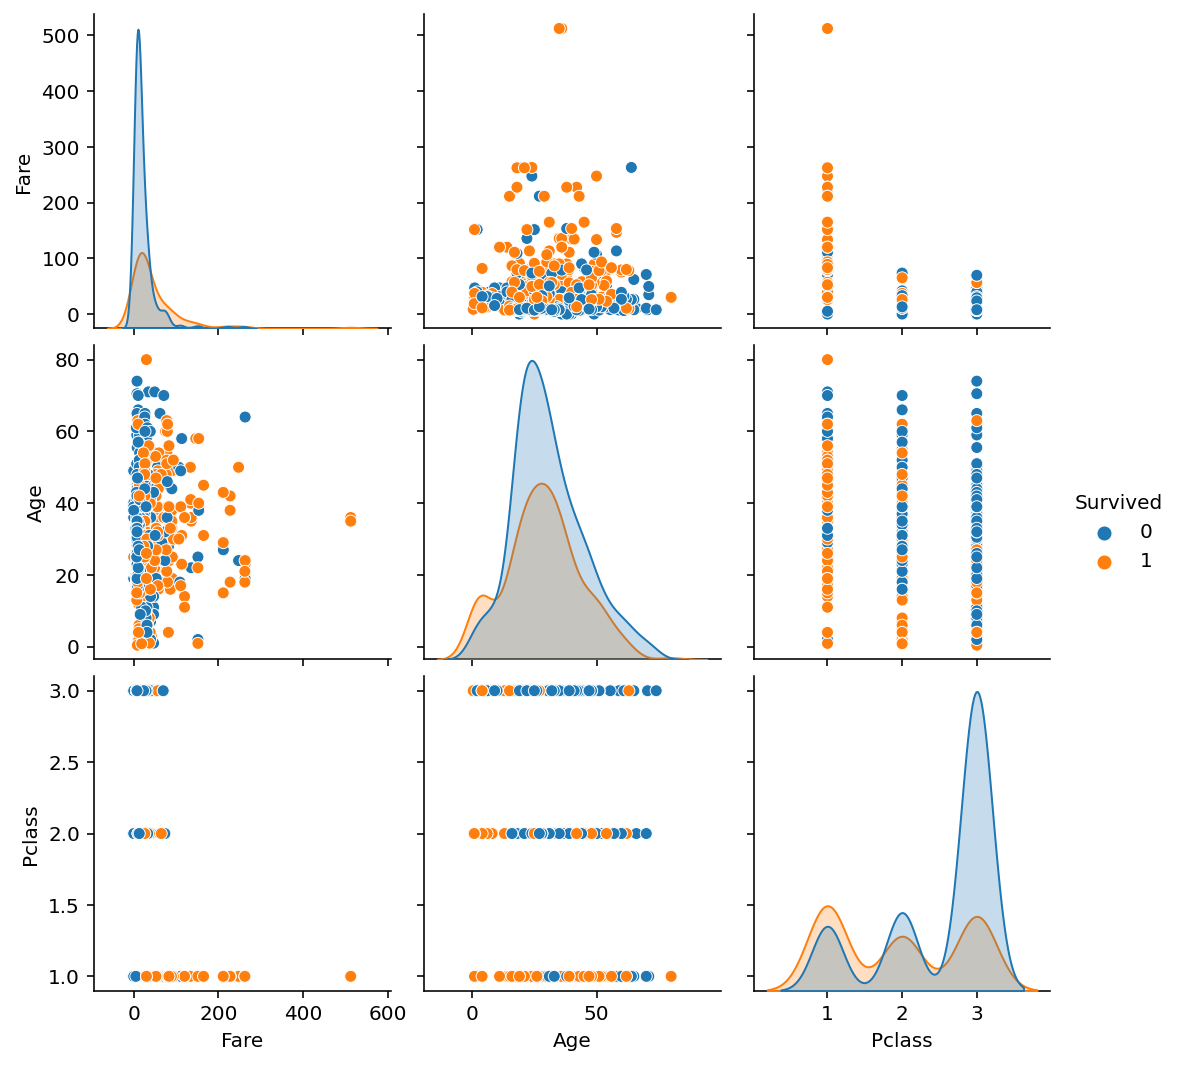

In [16]:
sns.pairplot(data=train[["Fare","Survived","Age","Pclass"]],
             hue="Survived", dropna=True);

In [17]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins=True).style.background_gradient(cmap='cubehelix_r')

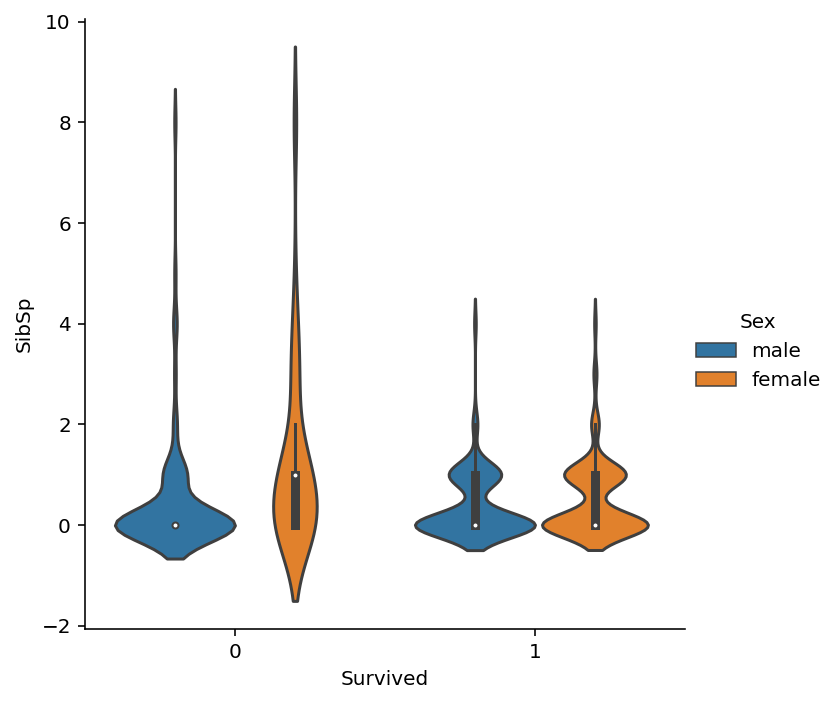

In [18]:
sns.catplot("Survived","SibSp", kind = "violin", hue = "Sex", data = train);

#Missing Values

In [19]:
 def missing_zero_values_table(df):
            zero_val = (df == 0.00).astype(int).sum(axis=0)
            mis_val = df.isnull().sum()
            mis_val_percent = 100 * df.isnull().sum() / len(df)
            mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
            mz_table = mz_table.rename(
            columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
            mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
            mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
            mz_table['Data Type'] = df.dtypes
            mz_table = mz_table[
                mz_table.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
            print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
                "There are " + str(mz_table.shape[0]) +
                  " columns that have missing values.")
            return mz_table


    

In [20]:
missing_zero_values_table(train)

Your selected dataframe has 11 columns and 891 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Cabin,0,687,77.1,687,77.1,object
Age,0,177,19.9,177,19.9,float64
Embarked,0,2,0.2,2,0.2,object


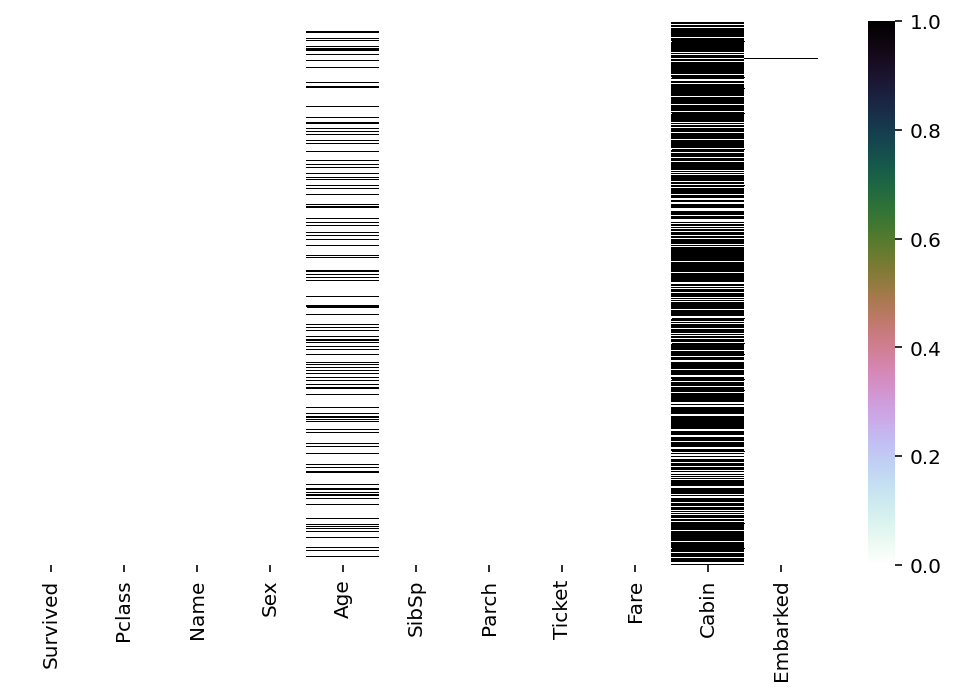

In [21]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(train.isnull(), cmap="cubehelix_r", yticklabels='')
plt.show()

##Handling Missing Values - Imputation

In [24]:
train["Embarked"] = train["Embarked"].fillna('S')


data = [train]

for dataset in data:
    mean = train["Age"].mean()
    std = train["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
train["Fare"] = train["Fare"].fillna(train["Fare"].median())

In [25]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#Feature Engineering

In [33]:
train.Cabin.fillna("Miss", inplace=True)
train.Cabin = [i[0] for i in train.Cabin.astype("str")]

train.Ticket = [i[0] for i in train.Ticket.astype("str")]

train.Fare_group = pd.DataFrame()

train['Age_group'] = 0
train.loc[train['Age']  <= 15, 'Age_group'] = 0
train.loc[(train['Age'] > 15) & (train['Age'] <= 30), 'Age_group']=1
train.loc[(train['Age'] > 30) & (train['Age'] <= 45), 'Age_group']=2
train.loc[(train['Age'] > 45) & (train['Age'] <= 60), 'Age_group']=3
train.loc[train['Age']  > 60, 'Age_group'] = 4

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train.Alone = pd.DataFrame()

train["Alone"] = np.where(train["FamilySize"] < 2, 1, 0)


def title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""


In [39]:
train['Title'] = train['Title'].apply(title)

train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

train['Fare_Per_Person'] = train['Fare']/(train['FamilySize'])

#train.drop(["Name"], axis = 1, inplace = True)

train["Cabin_Ticket"] = train["Cabin"]+"_"+train["Ticket"]

train['Cabin_Ticket_number'] = train['Cabin_Ticket'].apply(lambda x: len(x))
train['Title_grup_count'] = train.groupby(['Cabin_Ticket', 'Title'])['Cabin_Ticket_number'].transform('count')

train['Pclass_Alone_count'] = train.groupby(['Pclass', 'Alone'])['Age'].transform('count')

train['Pclass_Alone_mean'] = train.groupby(['Pclass', 'Alone'])['Age'].transform('mean')

train['Pclass_Alone_SibSp_count'] = train.groupby(['Pclass', 'Alone'])['SibSp'].transform('count')

train['Pclass_Alone_SibSp_mean'] = train.groupby(['Pclass', 'Alone'])['SibSp'].transform('mean')

train['Fare_group_Cabin_Age_count'] = train.groupby(['Fare', 'Cabin'])['Age'].transform('count')

train['Fare_group_Cabin_Age_mean'] = train.groupby(['Fare', 'Cabin'])['Age'].transform('mean')

train['Fare_group_Cabin_Fare_Per_Person_mean'] = train.groupby(['Fare', 'Cabin'])['Fare_Per_Person'].transform('mean')

train['Fare_group_Cabin_Fare_Per_Person_count'] = train.groupby(['Fare', 'Cabin'])['Fare_Per_Person'].transform('count')

train['Cabin_Ticket_Alone_count'] = train.groupby(['Cabin_Ticket', 'Alone'])['Age'].transform('count')

train['Cabin_Ticket_Alone_mean'] = train.groupby(['Cabin_Ticket', 'Alone'])['Age'].transform('mean')

train['Title_FamilySize_count'] = train.groupby(['Title', 'FamilySize'])['Fare'].transform('count')

train['Title_FamilySize_Parch_count'] = train.groupby(['Title', 'FamilySize'])['Parch'].transform('count')

train['Title_FamilySize_mean'] = train.groupby(['Title', 'FamilySize'])['Fare'].transform('mean')

train['Title_FamilySize_Parch_mean'] = train.groupby(['Title', 'FamilySize'])['Parch'].transform('mean')

columns=['Title_FamilySize_Parch_mean','Fare_group_Cabin_Age_mean', 'Age', 'Parch', 'SibSp', 'Title_FamilySize_mean', 'FamilySize', 'Fare_Per_Person', 'Fare_group_Cabin_Age_mean',
         'Cabin_Ticket_number', 'Fare_group_Cabin_Fare_Per_Person_count','Fare','Title_grup_count','Pclass_Alone_mean','Pclass_Alone_SibSp_count','Cabin_Ticket_Alone_mean','Title_FamilySize_count','Fare_group_Cabin_Fare_Per_Person_mean']

obj_cols=['Alone','Cabin_Ticket','Title', 'Fare','Cabin','Pclass','Age_group', "Embarked", "Sex"]


for col in columns:
    for feat in obj_cols:
        train[f'{col}_mean_group_{feat}']=train[col]/train.groupby(feat)[col].transform('mean')
        train[f'{col}_max_group_{feat}']=train[col]/train.groupby(feat)[col].transform('max')
        train[f'{col}_min_group_{feat}']=train[col]/train.groupby(feat)[col].transform('min')
        train[f'{col}_skew_group_{feat}']=train[col]/train.groupby(feat)[col].transform('skew')
        train[f'{col}_skew_group_{feat}']=train[col]/train.groupby(feat)[col].transform('count')

In [40]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,FamilySize,Alone,Title,Fare_Per_Person,Cabin_Ticket,Cabin_Ticket_number,Title_grup_count,Pclass_Alone_count,Pclass_Alone_mean,Pclass_Alone_SibSp_count,Pclass_Alone_SibSp_mean,Fare_group_Cabin_Age_count,Fare_group_Cabin_Age_mean,Fare_group_Cabin_Fare_Per_Person_mean,Fare_group_Cabin_Fare_Per_Person_count,Cabin_Ticket_Alone_count,Cabin_Ticket_Alone_mean,Title_FamilySize_count,Title_FamilySize_Parch_count,Title_FamilySize_mean,Title_FamilySize_Parch_mean,Title_FamilySize_Parch_mean_mean_group_Alone,Title_FamilySize_Parch_mean_max_group_Alone,Title_FamilySize_Parch_mean_min_group_Alone,Title_FamilySize_Parch_mean_skew_group_Alone,Title_FamilySize_Parch_mean_mean_group_Cabin_Ticket,Title_FamilySize_Parch_mean_max_group_Cabin_Ticket,Title_FamilySize_Parch_mean_min_group_Cabin_Ticket,Title_FamilySize_Parch_mean_skew_group_Cabin_Ticket,...,Title_FamilySize_count_mean_group_Sex,Title_FamilySize_count_max_group_Sex,Title_FamilySize_count_min_group_Sex,Title_FamilySize_count_skew_group_Sex,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Alone,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Alone,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Alone,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Alone,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Cabin_Ticket,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Cabin_Ticket,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Cabin_Ticket,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Cabin_Ticket,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Title,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Title,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Title,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Title,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Fare,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Fare,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Fare,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Fare,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Cabin,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Cabin,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Cabin,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Cabin,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Pclass,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Pclass,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Pclass,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Pclass,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Age_group,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Age_group,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Age_group,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Age_group,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Embarked,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Embarked,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Embarked,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Embarked,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Sex,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Sex,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Sex,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Sex
0,0,3,male,22,1,0,A,7.2500,M,S,1,2,0,,3.62500,M_A,3,29,167,21.730539,167,1.808383,13,29.846154,6.971154,13,6,31.500000,161,161,49.894129,0.236025,0.245744,0.085827,1.0,0.000667,2.139643,0.209344,inf,0.008139,...,0.389065,0.299814,26.833333,0.279029,0.342702,0.018142,1.978811,0.019693,0.833343,0.532912,1.000000,0.240385,0.350021,0.013607,inf,0.007824,1.0,1.0,1.0,0.536243,0.552538,0.013607,inf,0.010147,0.863143,0.123392,inf,0.014198,0.402798,0.030639,inf,0.017298,0.435435,0.031433,inf,0.010791,0.415339,0.018142,inf,0.012082
1,1,1,female,38,1,0,P,71.2833,C,C,2,2,0,,35.64165,C_P,3,15,107,35.261682,107,0.841121,1,38.000000,35.641650,1,8,34.250000,161,161,49.894129,0.236025,0.245744,0.085827,1.0,0.000667,1.875000,1.000000,inf,0.015735,...,0.576423,0.299814,26.833333,0.512739,1.752143,0.092757,10.117134,0.100683,0.371395,0.160708,1.600074,2.376110,1.789565,0.069568,inf,0.040002,1.0,1.0,1.0,35.641650,0.681824,0.16070

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 644 entries, Survived to Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Sex
dtypes: float64(621), int64(15), object(8)
memory usage: 4.4+ MB


#Drop Correlated Features

In [42]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations !")
print(get_top_abs_correlations(train.select_dtypes(include=['int32','int64']), 30))

Top Absolute Correlations !
Title_FamilySize_count                  Title_FamilySize_Parch_count              1.000000
Fare_group_Cabin_Age_count              Fare_group_Cabin_Fare_Per_Person_count    1.000000
Pclass_Alone_count                      Pclass_Alone_SibSp_count                  1.000000
Alone                                   Title_FamilySize_count                    0.985405
                                        Title_FamilySize_Parch_count              0.985405
Age                                     Age_group                                 0.947083
Title_grup_count                        Cabin_Ticket_Alone_count                  0.920685
SibSp                                   FamilySize                                0.890712
FamilySize                              Title_FamilySize_Parch_count              0.787184
                                        Title_FamilySize_count                    0.787184
Parch                                   FamilySize            

In [43]:
train.drop(["Title_FamilySize_Parch_count", "Fare_group_Cabin_Fare_Per_Person_count", "Pclass_Alone_SibSp_count"], axis = 1, inplace = True)

In [45]:
train.shape

(891, 641)

#Label Encoding

In [49]:
categorical_1 = ["Pclass", "Sex", "Ticket", "Cabin", "Embarked", "Fare", "Age_group", "Alone", "Title", "Cabin_Ticket"]

from sklearn.preprocessing import LabelEncoder
for col in train[categorical_1].columns:
        
    train[col] = train[col].astype(str)

        
    le = LabelEncoder()
    le.fit(list(train[col]))
    train[col] = le.transform(train[col])
    train[col] = train[col].astype('category')


In [50]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,FamilySize,Alone,Title,Fare_Per_Person,Cabin_Ticket,Cabin_Ticket_number,Title_grup_count,Pclass_Alone_count,Pclass_Alone_mean,Pclass_Alone_SibSp_mean,Fare_group_Cabin_Age_count,Fare_group_Cabin_Age_mean,Fare_group_Cabin_Fare_Per_Person_mean,Cabin_Ticket_Alone_count,Cabin_Ticket_Alone_mean,Title_FamilySize_count,Title_FamilySize_mean,Title_FamilySize_Parch_mean,Title_FamilySize_Parch_mean_mean_group_Alone,Title_FamilySize_Parch_mean_max_group_Alone,Title_FamilySize_Parch_mean_min_group_Alone,Title_FamilySize_Parch_mean_skew_group_Alone,Title_FamilySize_Parch_mean_mean_group_Cabin_Ticket,Title_FamilySize_Parch_mean_max_group_Cabin_Ticket,Title_FamilySize_Parch_mean_min_group_Cabin_Ticket,Title_FamilySize_Parch_mean_skew_group_Cabin_Ticket,Title_FamilySize_Parch_mean_mean_group_Title,Title_FamilySize_Parch_mean_max_group_Title,Title_FamilySize_Parch_mean_min_group_Title,...,Title_FamilySize_count_mean_group_Sex,Title_FamilySize_count_max_group_Sex,Title_FamilySize_count_min_group_Sex,Title_FamilySize_count_skew_group_Sex,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Alone,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Alone,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Alone,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Alone,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Cabin_Ticket,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Cabin_Ticket,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Cabin_Ticket,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Cabin_Ticket,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Title,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Title,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Title,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Title,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Fare,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Fare,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Fare,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Fare,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Cabin,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Cabin,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Cabin,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Cabin,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Pclass,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Pclass,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Pclass,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Pclass,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Age_group,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Age_group,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Age_group,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Age_group,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Embarked,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Embarked,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Embarked,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Embarked,Fare_group_Cabin_Fare_Per_Person_mean_mean_group_Sex,Fare_group_Cabin_Fare_Per_Person_mean_max_group_Sex,Fare_group_Cabin_Fare_Per_Person_mean_min_group_Sex,Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Sex
0,0,2,1,22,1,0,9,174,7,2,1,2,0,0,3.62500,39,3,29,167,21.730539,1.808383,13,29.846154,6.971154,6,31.500000,161,49.894129,0.236025,0.245744,0.085827,1.0,0.000667,2.139643,0.209344,inf,0.008139,0.618524,0.085827,inf,...,0.389065,0.299814,26.833333,0.279029,0.342702,0.018142,1.978811,0.019693,0.833343,0.532912,1.000000,0.240385,0.350021,0.013607,inf,0.007824,1.0,1.0,1.0,0.536243,0.552538,0.013607,inf,0.010147,0.863143,0.123392,inf,0.014198,0.402798,0.030639,inf,0.017298,0.435435,0.031433,inf,0.010791,0.415339,0.018142,inf,0.012082
1,1,0,0,38,1,0,13,199,2,0,2,2,0,0,35.64165,12,3,15,107,35.261682,0.841121,1,38.000000,35.641650,8,34.250000,161,49.894129,0.236025,0.245744,0.085827,1.0,0.000667,1.875000,1.000000,inf,0.015735,0.618524,0.085827,inf,...,0.576423,0.299814,26.833333,0.512739,1.752143,0.092757,10.117134,0.100683,0.371395,0.160708,1.600074,2.376110,1.789565,0.069568,in

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 641 entries, Survived to Fare_group_Cabin_Fare_Per_Person_mean_skew_group_Sex
dtypes: category(10), float64(620), int64(10), object(1)
memory usage: 4.3+ MB
